<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Открытие-файла-и-знакомство-с-данными" data-toc-modified-id="Открытие-файла-и-знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Открытие файла и знакомство с данными</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Проверка-ряда-на-стационарность" data-toc-modified-id="Проверка-ряда-на-стационарность-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка ряда на стационарность</a></span></li><li><span><a href="#Разложение-временного-ряда-на-тренд,-сезонность-и-остаток" data-toc-modified-id="Разложение-временного-ряда-на-тренд,-сезонность-и-остаток-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разложение временного ряда на тренд, сезонность и остаток</a></span></li><li><span><a href="#Создание-признаков-для-обучения-моделей" data-toc-modified-id="Создание-признаков-для-обучения-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Создание признаков для обучения моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Градиентный-бустинг-CatBoost" data-toc-modified-id="Градиентный-бустинг-CatBoost-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Градиентный бустинг <em>CatBoost</em></a></span></li><li><span><a href="#Обучение-модели-Дерева-решений" data-toc-modified-id="Обучение-модели-Дерева-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение модели Дерева решений</a></span></li><li><span><a href="#Обучение-модели-Случайного-леса" data-toc-modified-id="Обучение-модели-Случайного-леса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение модели Случайного леса</a></span></li><li><span><a href="#Обучение-модели-Линейной-регрессии" data-toc-modified-id="Обучение-модели-Линейной-регрессии-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обучение модели Линейной регрессии</a></span></li><li><span><a href="#Обучение-Dummy-модели" data-toc-modified-id="Обучение-Dummy-модели-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Обучение <em>Dummy</em> модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

<b>Описание целей и задачи проекта:</b>

<br>Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Необхожимо построить модель для такого предсказания.

Обязательное условие: значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

<b>План работы:</b>

1. Загрузка данных и выполнение их ресемплирования по одному часу.
2. Анализ данных:
    - Проверка ряда на стационарность
    - Анализ на тренды и сезонность
    - Создание признаков для обучения моделей 
3. Деление ряда на три выборки:
    - Обучающую - 72% данных
    - Валидационную - 18% данных
    - Тестовую - 10% данных (по условию)
4. Обучение разных моделей с различными гиперпараметрами:
    - Градиентный бустинг *CatBoostRegressor*
    - *DecisionTreeRegressor*
    - *RandomForestRegressor*
    - *LinearRegression*
    - *DummyRegressor* - для проверки на адекватность
5. Проверка данных на тестовой выборке и формулирование выводов.

<b>Описание данных:</b>
- Данные лежат в файле /datasets/taxi.csv.
- Количество заказов находится в столбце 'num_orders' (от англ. number of orders, «число заказов»).

## Подготовка

Импорт необходимых для исследования инструментов

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error as mse
from catboost import CatBoostRegressor, Pool

### Открытие файла и знакомство с данными

Открытие файла с распознаванием дат и формированием новых индексов

In [ ]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
display(data.sample())
data.info()

,num_orders
datetime,
2018-05-29 09:30:00,15


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Сортировка в порядке возрастания

In [ ]:
data.sort_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Ресемплинг по суммарным значениям за час

In [ ]:
data = data.resample('1H').sum()

### Вывод

- Данные получены, открыты с распознаванием дат и формированием новых индексов
- Поизведена сортировка данных в порядке хронологическом порядке от старых к новым
- Произведён ресемплинг по суммарным значениям за час

## Анализ

### Проверка ряда на стационарность

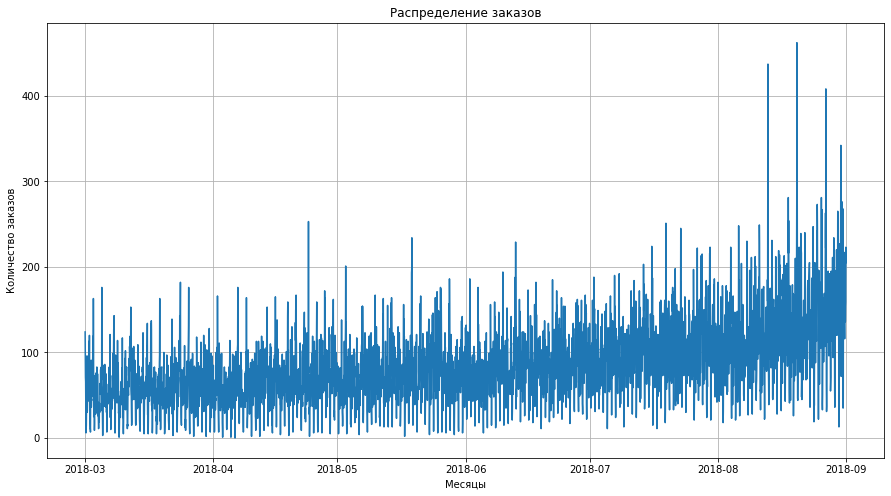

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(data)
plt.title("Распределение заказов")
plt.xlabel("Месяцы")
plt.ylabel("Количество заказов")
plt.grid()
plt.show()

Вычисление разностей временного ряда. Изображение на графике скользящего среднего и скользящего стандартного отклонения

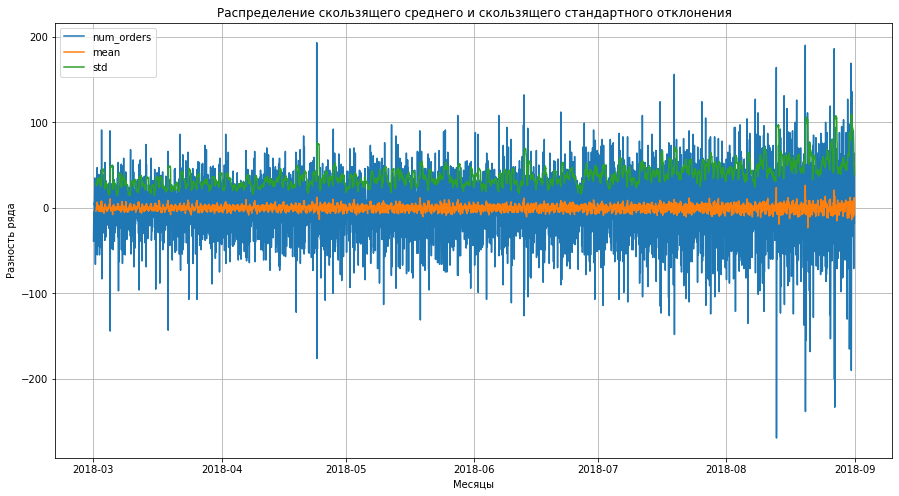

In [ ]:
data_converted = data - data.shift()
data_converted['mean'] = data_converted['num_orders'].rolling(15).mean()
data_converted['std'] = data_converted['num_orders'].rolling(15).std()
plt.figure(figsize=(15, 8))
plt.plot(data_converted)
plt.title("Распределение скользящего среднего и скользящего стандартного отклонения")
plt.xlabel("Месяцы")
plt.ylabel("Разность ряда")
plt.legend((['num_orders', 'mean', 'std']))
plt.grid()
plt.show()

Ряд стал более стационарным

Проведение теста Дики-Фуллера

In [ ]:
adfuller(data)

(-3.0689242890279558,
 0.028940051402612906,
 30,
 4385,
 {'1%': -3.431842162413052,
  '5%': -2.8621993540813637,
  '10%': -2.567120978470452},
 41728.71357827463)

Fнализ ряда на тренды и сезонность

### Разложение временного ряда на тренд, сезонность и остаток

Построение графика тренда в заказах

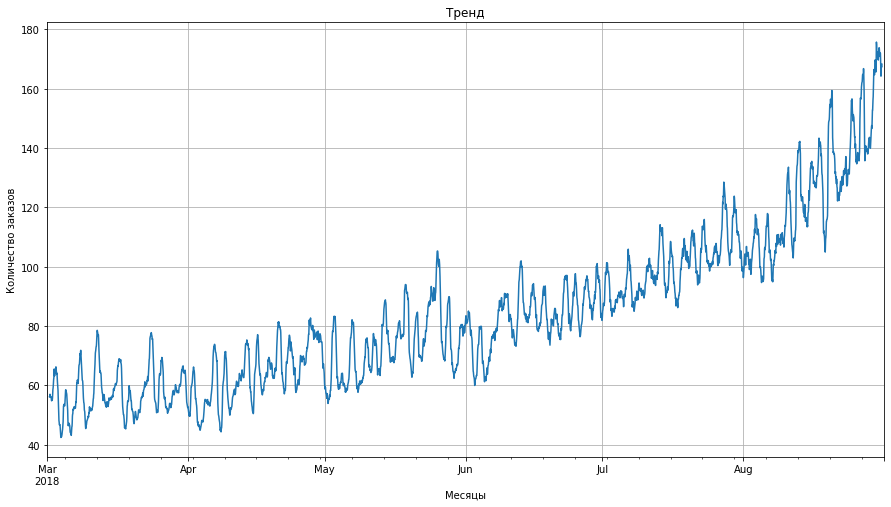

In [ ]:
decomposed = seasonal_decompose(data)

plt.figure(figsize=(15, 8))

decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.xlabel("Месяцы")
plt.ylabel("Количество заказов")
plt.grid(True)
plt.show()

Построение графика сезонности в заказах

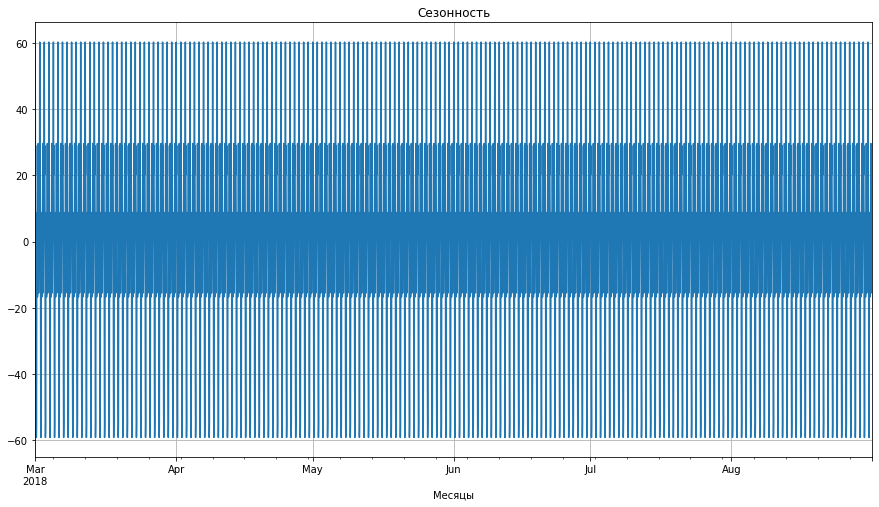

In [ ]:
plt.figure(figsize=(15, 8))
decomposed.seasonal.plot(ax=plt.gca())

plt.title('Сезонность')
plt.xlabel("Месяцы")
plt.grid(True)
plt.show()

Уточнение графика сезонности (период - месяц: 01.03.18 - 31.03.18)

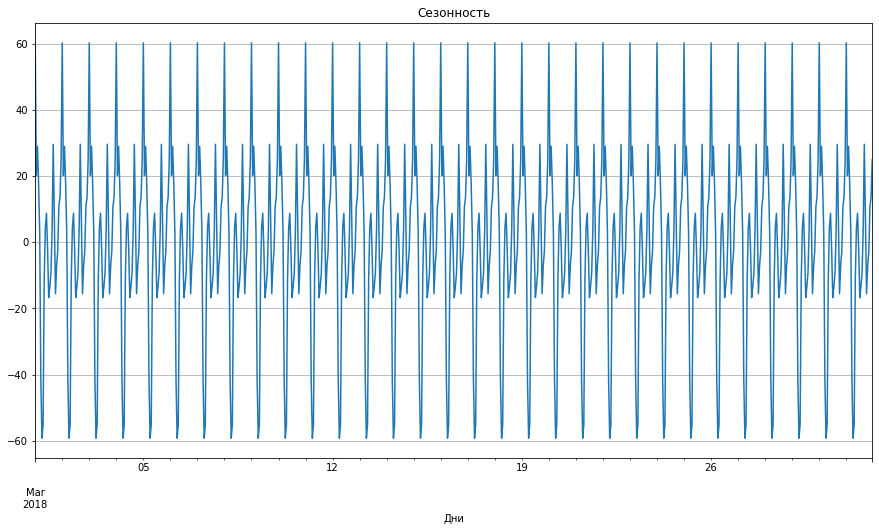

In [ ]:
plt.figure(figsize=(15, 8))
decomposed.seasonal['2018-03-01':'2018-03-31'].plot(ax=plt.gca())
plt.title('Сезонность')
plt.xlabel("Дни")
plt.grid(True)
plt.show()

Уточнение графика сезонности (период - неделя: понедельник (05.03.18) - воскресенье (11.03.18))

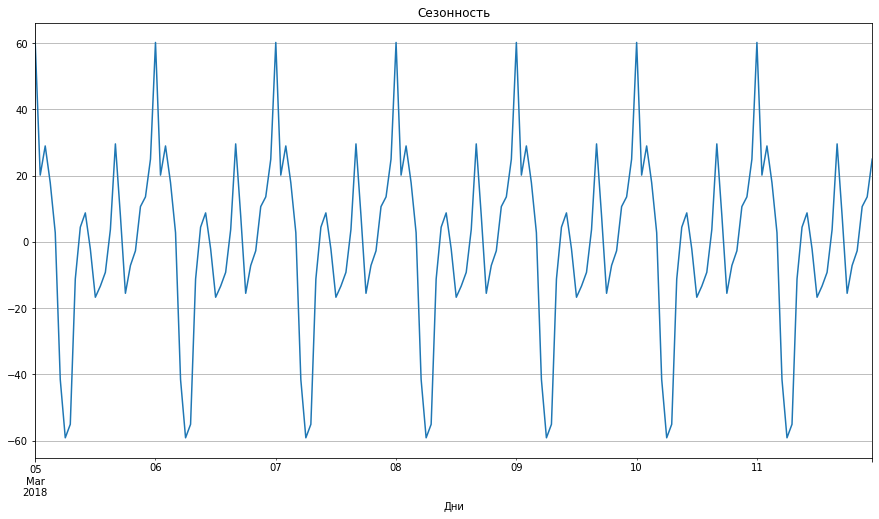

In [ ]:
plt.figure(figsize=(15, 8))
decomposed.seasonal['2018-03-05':'2018-03-11'].plot(ax=plt.gca())
plt.title('Сезонность')
plt.xlabel("Дни")
plt.grid(True)
plt.show()

Уточнение графика сезонности (период - день: 01.03.2018)

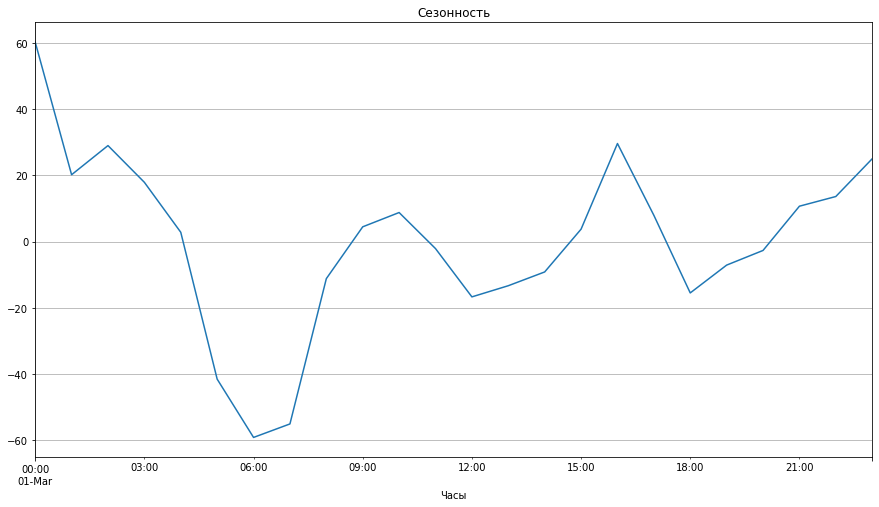

In [ ]:
plt.figure(figsize=(15, 8))
decomposed.seasonal['2018-03-01':'2018-03-01'].plot(ax=plt.gca())
plt.title('Сезонность')
plt.xlabel("Часы")
plt.grid(True)
plt.show()

### Создание признаков для обучения моделей

Написание функции ***create_features*** для создания признаков. На вход функция принимает временной ряд *data*, максимальный размер отставания *max_lag* и *rm_size* - размер окна для вычисления значений скользящего среднего

In [ ]:
def create_features(data, max_lag, rm_size):
    try: 
        data['dayofweek'] = data.index.dayofweek
        data['hour'] = data.index.hour
            
        for lag in range(1, max_lag + 1):
            data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

        data['rolling_mean'] = data['num_orders'].shift().rolling(rm_size).mean()
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")

Создание признаков

In [ ]:
create_features(data, 20, 20)
data.head()

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удаление отсутствующих значений признаков

In [ ]:
data = data.dropna()
data.head()

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 20:00:00,61,3,20,45.0,73.0,44.0,43.0,66.0,48.0,32.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,53.30
2018-03-01 21:00:00,66,3,21,61.0,45.0,73.0,44.0,43.0,66.0,48.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,50.15
2018-03-01 22:00:00,113,3,22,66.0,61.0,45.0,73.0,44.0,43.0,66.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,49.20
2018-03-01 23:00:00,58,3,23,113.0,66.0,61.0,45.0,73.0,44.0,43.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,51.30
2018-03-02 00:00:00,90,4,0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,50.90


### Вывод

- Для того, чтобы ряд подготовить к прогнозированию, достаточно вычислить его разности
- Наблюдается общий тренд к росту заказов
- Наблюдается сезонность по дням недели и времени суток
- Созданы дополнительные признаки из разбиения дат, "отстающих значений", и скользящего среднего
- Данные подготовлены для обучения моделей

## Обучение

Подготовка выборок для проведения обучения (тестовая, валидационная и обучающая)

In [ ]:
train_90, test = train_test_split(data, shuffle=False, test_size=.1)
train, valid = train_test_split(train_90, shuffle=False, test_size=.2)
test.shape, valid.shape, train.shape

((440, 24), (792, 24), (3164, 24))

Выделение признаков и целевых признаков

In [ ]:
X_train = train.drop(['num_orders'], axis=1)
X_valid = valid.drop(['num_orders'], axis=1)
X_test = test.drop(['num_orders'], axis=1)
X_train_90 = train_90.drop(['num_orders'], axis=1)
y_train = train[['num_orders']]
y_valid = valid[['num_orders']]
y_test = test[['num_orders']]
y_train_90 = train_90[['num_orders']]

### Градиентный бустинг *CatBoost*

Подбор параметров

In [ ]:
%time
tsscv = TimeSeriesSplit(n_splits=round(train.shape[0] / test.shape[0] - 1))

catboost = CatBoostRegressor(loss_function='RMSE',random_state = 12345)
parameters_cb = {'depth':[5, 10], 
                 'learning_rate':np.arange(0.1,1,0.2)} 
                 
gs_cb = catboost.grid_search(parameters_cb,
            Pool(X_train, y_train),cv=tsscv, verbose=True)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs
0:	learn: 68.8684678	test: 88.1795200	best: 88.1795200 (0)	total: 50.8ms	remaining: 50.7s
1:	learn: 63.5248862	test: 82.1239538	best: 82.1239538 (1)	total: 54ms	remaining: 27s
2:	learn: 58.6105826	test: 76.7102788	best: 76.7102788 (2)	total: 57ms	remaining: 18.9s
3:	learn: 54.1918252	test: 71.6322691	best: 71.6322691 (3)	total: 59.8ms	remaining: 14.9s
4:	learn: 50.3233717	test: 67.1692534	best: 67.1692534 (4)	total: 62.8ms	remaining: 12.5s
5:	learn: 46.9835273	test: 63.0284878	best: 63.0284878 (5)	total: 65.4ms	remaining: 10.8s
6:	learn: 43.9289968	test: 59.3250177	best: 59.3250177 (6)	total: 68.1ms	remaining: 9.66s
7:	learn: 41.2290651	test: 55.8774020	best: 55.8774020 (7)	total: 70.9ms	remaining: 8.79s
8:	learn: 38.8788614	test: 52.9618052	best: 52.9618052 (8)	total: 73.8ms	remaining: 8.13s
9:	learn: 36.5842263	test: 50.5682268	best: 50.5682268 (9)	total: 76.7ms	remaining: 7.6s
10:	learn: 34.8599470	test: 48.3647211	

Установка выбранных параметров и обучение модели

In [ ]:
model_cb = CatBoostRegressor(depth=gs_cb["params"]["depth"],
                             learning_rate=gs_cb["params"]['learning_rate'],
                             loss_function='RMSE',verbose=True)
                             
model_cb.fit(Pool(X_train_90, y_train_90), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 37.0196455	total: 3.84ms	remaining: 3.83s
1:	learn: 35.5919063	total: 7.46ms	remaining: 3.73s
2:	learn: 34.0945581	total: 10.9ms	remaining: 3.63s
3:	learn: 33.1763401	total: 14.1ms	remaining: 3.51s
4:	learn: 32.1714557	total: 17.6ms	remaining: 3.5s
5:	learn: 31.4488039	total: 20.9ms	remaining: 3.46s
6:	learn: 30.7350289	total: 24.3ms	remaining: 3.45s
7:	learn: 29.9487875	total: 28ms	remaining: 3.47s
8:	learn: 29.4302384	total: 31.4ms	remaining: 3.46s
9:	learn: 28.9694992	total: 35ms	remaining: 3.46s
10:	learn: 28.5201369	total: 38.3ms	remaining: 3.45s
11:	learn: 28.0281254	total: 41.6ms	remaining: 3.42s
12:	learn: 27.5056204	total: 44.9ms	remaining: 3.41s
13:	learn: 27.1957758	total: 48.3ms	remaining: 3.4s
14:	learn: 26.8172273	total: 51.8ms	remaining: 3.4s
15:	learn: 26.4328310	total: 55.2ms	remaining: 3.39s
16:	learn: 26.0986589	total: 58.4ms	remaining: 3.38s
17:	learn: 25.7877695	total: 61.9ms	remaining: 3.38s
18:	learn: 25.6353049	total: 65ms	remaining: 3.35s
19:	learn: 2

Получение предсказаний и вычисление значения *RMSE*

In [ ]:
mse(y_valid, model_cb.predict(X_valid)) ** .5

9.02067875638887

### Обучение модели Дерева решений

Подбор оптимальной глубины в цикле и получение значения *RMSE*

37.19042231600574

10

CPU times: user 471 ms, sys: 0 ns, total: 471 ms
Wall time: 469 ms


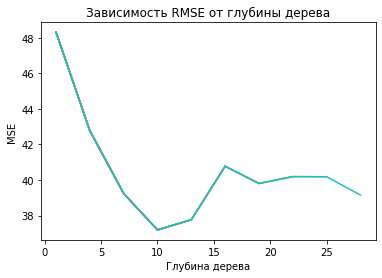

In [ ]:
%%time
best_result = 500
depth = 0
depths = []
results = []

for depth in range(1, 30, 3):
    model_dtr = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model_dtr.fit(X_train, y_train)
    predictions_valid = model_dtr.predict(X_valid)
    result = mse(y_valid, predictions_valid) ** .5
    depths.append(depth)
    results.append(result)
        
    plt.plot(depths, results)
    plt.title("Зависимость RMSE от глубины дерева")
    plt.xlabel("Глубина дерева")
    plt.ylabel("MSE")
    plt.grid()
    plt.show
            
    if result < best_result:
        best_depth = depth
        best_result = result

display(best_result, best_depth)

### Обучение модели Случайного леса

Подбор параметров

In [ ]:
%time

model_rfr = RandomForestRegressor(random_state=12345)
parameters = {"max_depth": [1, 23, 3],"n_estimators":[50, 150, 10]}

gs_rfr = GridSearchCV(model_rfr, parameters, cv = tsscv, verbose=True, n_jobs=-1)
gs_rfr.fit(X_train, y_train.values.ravel())

gs_rfr.best_params_

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
Fitting 6 folds for each of 9 candidates, totalling 54 fits


{'max_depth': 23, 'n_estimators': 150}

Получение значения *RMSE*

In [ ]:
model_rfr = RandomForestRegressor(random_state=12345, 
                                  max_depth=gs_rfr.best_params_['max_depth'], 
                                  n_estimators=gs_rfr.best_params_['n_estimators'])
model_rfr.fit(X_train, y_train.values.ravel())

mse(y_valid.values.ravel(), model_rfr.predict(X_valid)) ** .5

32.92841618226356

### Обучение модели Линейной регрессии

In [ ]:
%time
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
mse(y_valid, model_lr.predict(X_valid)) **.5

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


39.34797336987191

### Обучение *Dummy* модели

In [ ]:
model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(X_train, y_train)
mse(y_valid, model_dummy.predict(X_valid)) **.5

55.13898073231146

### Вывод

- У модели *CatBoostRegressor* результат *RMSE = 9*
- Лучший результат *RMSE = 37* у *DecisionTreeRegressor* получился при глубине дерева 10.
- У модели *RandomForestRegressor* результат *RMSE = 32.9* при глубине 23, количестве деревьев - 150
- У модели *LinearRegression* результат *RMSE = 39.3*
- Модель *DummyRegressor* показала результат *RMSE = 55*
<br><b>Для тестирования выбрана модель *CatBoostRegressor*</b>

## Тестирование

Обучение модели на полных данных и получение предсказаний на тестовой выборке

In [ ]:
model_cb.fit(X_train_90, y_train_90)
predict = model_cb.predict(X_test)
mse(y_test, predict) ** .5

0:	learn: 37.0196455	total: 3.62ms	remaining: 3.62s
1:	learn: 35.5919063	total: 7.31ms	remaining: 3.65s
2:	learn: 34.0945581	total: 10.8ms	remaining: 3.6s
3:	learn: 33.1763401	total: 14.3ms	remaining: 3.56s
4:	learn: 32.1714557	total: 17.7ms	remaining: 3.52s
5:	learn: 31.4488039	total: 21.1ms	remaining: 3.5s
6:	learn: 30.7350289	total: 24.4ms	remaining: 3.47s
7:	learn: 29.9487875	total: 27.8ms	remaining: 3.45s
8:	learn: 29.4302384	total: 31.4ms	remaining: 3.46s
9:	learn: 28.9694992	total: 34.8ms	remaining: 3.44s
10:	learn: 28.5201369	total: 38.1ms	remaining: 3.43s
11:	learn: 28.0281254	total: 41.4ms	remaining: 3.41s
12:	learn: 27.5056204	total: 44.6ms	remaining: 3.39s
13:	learn: 27.1957758	total: 47.9ms	remaining: 3.37s
14:	learn: 26.8172273	total: 51.1ms	remaining: 3.36s
15:	learn: 26.4328310	total: 54.3ms	remaining: 3.34s
16:	learn: 26.0986589	total: 57.7ms	remaining: 3.33s
17:	learn: 25.7877695	total: 61.1ms	remaining: 3.33s
18:	learn: 25.6353049	total: 64.1ms	remaining: 3.31s
19:	l

42.2027149079541

Проверка адекватности предсказания (сравнение с *DummyRegressor*)

In [ ]:
model_dummy.fit(X_train_90, y_train_90)
mse(y_test, model_dummy.predict(X_test)) ** .5

84.69056594015109

Построение графиков с реальным и предсказанным значением тестовой выборки

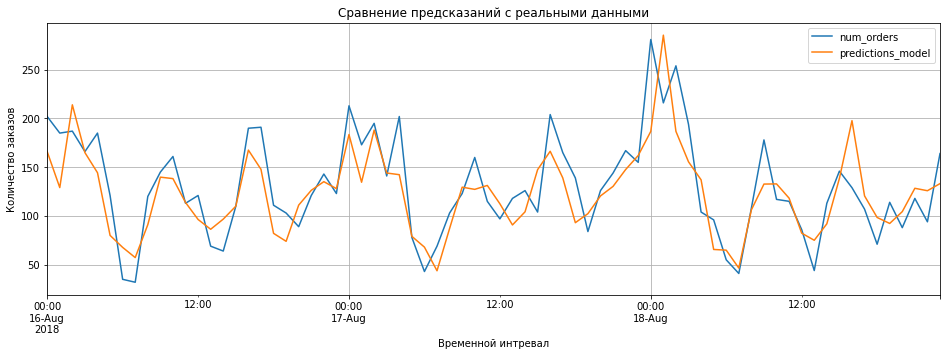

In [ ]:
predictions_model = pd.Series(data = predict, name = 'predictions_model', index = X_test.index)

y_test['2018-08-16':'2018-08-18'].plot(figsize=(16,5), grid=True, legend=True)
predictions_model['2018-08-16':'2018-08-18'].plot(grid=True, legend=True)
plt.title('Сравнение предсказаний с реальными данными')
plt.xlabel('Временной интревал')
plt.ylabel('Количество заказов')
plt.show()

### Вывод

- Выбранная модель с рассчитаными параметрами на тестовой выборке получила хороший результат *RMSE*, удовлетворяющий условиям задачи: 46.96 < 48 
- Проверка на адекватность показала, что точность выбранной модели гораздо выше модели, предсказывающей только средние значения.

## Общий вывод

В ходе исследования выполены следующие действия:
- Данные получены, открыты с распознаванием дат и формированием новых индексов
- Поизведена сортировка данных в порядке хронологическом порядке от старых к новым
- Произведён ресемплинг по суммарным значениям за час
- Созданы дополнительные признаки из разбиения дат, "отстающих значений", и скользящего среднего
- Данные подготовлены для обучения моделей

<br>В исследовании участвовали четыре модели. При подборе параметров получены заключения:
- У модели *CatBoostRegressor* результат *RMSE = 9*
- Лучший результат *RMSE = 37* у *DecisionTreeRegressor* получился при глубине дерева 10.
- У модели *RandomForestRegressor* результат *RMSE = 32.9* при глубине 23, количестве деревьев - 150
- У модели *LinearRegression* результат *RMSE = 39.3*
- Модель *DummyRegressor* показала результат *RMSE = 55*

<br>Для тестирования выбрана модель *CatBoostRegressor*
- Выбранная модель с рассчитаными параметрами на тестовой выборке получила хороший результат RMSE, удовлетворяющий условиям задачи: 42.2 < 48
- Проверка на адекватность показала, что точность выбранной модели гораздо выше модели, предсказывающей только средние значения.